** Applying Naive Bayes and Linear discriminant analysis to a dataset and comparing the two model fits. **

In [141]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# To calculate the accuracy score of the model

***Importing data from Titanic dataset with columns PassengerID, Age, Fare,Passanger Class ***

In [142]:
df= pd.read_csv("C:/Users/Ashwini/Desktop/STATS & ML/Titanic.csv")
X = df.iloc[:, 1:3].values
y = df.iloc[:, 3].values
df.head()

,PassengerId,Age,Fare,Pclass
0,1,22,7,3
1,2,38,71,1
2,3,26,8,3
3,4,35,53,1
4,5,35,8,3


***Splitting the dataset into 2 sets: Training set and Test set***

In [143]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## NAIVE BAYES CLASSIFIER

***Fitting Naive Bayes classifier***

In [146]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

*** Visualising the Training set results***

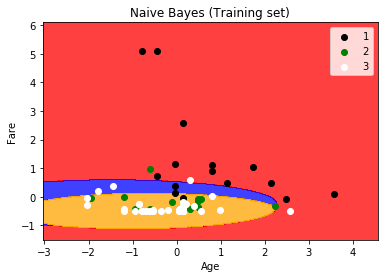

In [147]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue','orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'green','white'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

*** Visualising the Test set results***

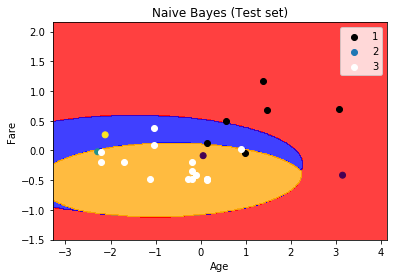

In [148]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue','orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'green','white'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

*** Making the Confusion Matrix***

In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)# making confusion matrix
cm

array([[ 4,  1,  1],
       [ 1,  1,  2],
       [ 0,  1, 14]], dtype=int64)

***Calculating Accuracy Score for Naive bayes classification***

In [151]:
accuracy_score(target_test, target_pred, normalize = True) # calculating accuracy of model

0.73474178403755863

## LINEAR DISCRIMINANT ANALYSIS

In [167]:
from sklearn import cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import colors

y = df.values[:, 3]
A = df.values[:, 1:3]

***Fitting Linear Discrimant Analysis***

In [168]:
lda = LinearDiscriminantAnalysis(n_components=2) 
lda.fit(A, y) # fitting LDA
drA = lda.transform(A)

*** Making the Confusion Matrix***

In [169]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4,  1,  1],
       [ 1,  1,  2],
       [ 0,  1, 14]], dtype=int64)

***Calculating Accuracy Score for Linear discriminant analysis***

In [172]:
lda = LinearDiscriminantAnalysis()
k_fold = cross_validation.KFold(len(A), 3, shuffle=True)

for (trn, tst) in k_fold:
    lda.fit(A[trn], y[trn])
    outVal = lda.score(A[tst], y[tst])
   
print('Score: ' + str(outVal))

Score: 0.69696969697


### Comparing both Model Fits:

***Accuracy of Naive Baye's Classifier: 0.73474178403755863***

***Accuracy of Linear Discriminant Analysis: 0.69696969697***

***Here we can say that for the give dataset Titanic, Accuracy for Naive Baye's is higher than LDA***

## REFERENCES:

http://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/

https://nicholastsmith.wordpress.com/2016/02/13/wine-classification-using-linear-discriminant-analysis-with-python-and-scikit-learn/